# CUHK-STAT1013: Practical Assignment Part 1: Sharing Your Idea and Data
## Ng Hon Lam 1155142919

## Data Science Job Salaries dataset background

**Description**:

The dataset describes the salaries of data science jobs from 2020 to 2022, with different positions in different countries.

The dataset is collected by ai-jobs.net, which is a job site for AI, ML, NLP, DE, DA, DS and so on related jobs.

This dataset is found at kaggle: [https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries).

**Sample size**: 607

**Feature**:
| Feature | Description | Data type   | 
| ----------- | ----------- |----------- |
| work_year | which year the salary was paid | int64 |
| experience_level | experience level, such as Entry-level / Mid-level / Senior-level / Executive-level / Director | object |
| employment_type | Part-time, Full-time, Contract, Freelance | object | 
| job_title | what kind of data-related jobs | object |  
| salary | total gross salary amount paid |  int64 |
| salary_currency | currency of the salary paid |  object |
| salary_in_usd | salary transferred in USD  |  int64 |
| employee_residence | Employee's primary country of residence| object  |
| remote_ratio | overall amount of work done remotely | object  |
| company_location | country of the employer's main office  |  object |
| company_size | 3 categories: Small(<50 employees), Medium(50-250 employees), Large(>250 employees) | object  |






## Hypothesis

- Tell us what your idea is and why you have chosen to pursue this idea. 
  - The idea is that "*Did a company of large size have a higher salary than the company of medium size in the data science domain ?*"
  - As a student majoring in statistics, we are interested in the graduate jobs in the field of data science.
  - Also, there are many rumors that working in a larger company may have more salary than a company of smaller size. We are interested in verifying this rumor by some statistics methods.

- What two groups you are comparing:
  - **G1**: Annual salary of the employees in large size of companies; **G2**: Annual salary of the employees in medium size of companies

- What you will be measuring (i.e., what your response variable will be) 
  - `salary_in_usd`, in which the currency is transferred into USD already.

- Is your response variable quantitative rather than categorical? 
  - `salary_in_usd` is regarded as a quantitative variable, which take the range of 2859USD to 600000USD.

- Make a prediction about what kind of difference you expect to see between your samples and WHY. 
  - We'd expect that **G1** > **G2** that the annual salary of the employees in larger companies will be higher.
  - Since the larger companies with more than 250 employees should have larger scale and abundant resources, so employee benefits should be more generous.
  - Several large companies may even provide financial aids for their employees to pursue a Master's degree.

- Talk about how you will gather your data
  - From Kaggle: [https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries)
  - It is a popular dataset in Kaggle with 1335 upvotes (up to 27-Feb).

- If you had unlimited resources (time, money, staff, etc.) how would you collect your data? 
  - (i) Attempt to collect more data on employees in different countries
  - (ii) Collect the data with a certain ratio of experience level, employment type and so on, since the imbalanced data may affect our decision and results
  - (iii) Since the topic is related to salary or money, I will pay more resources and efforts on protecting the privacy of respondents, such as conducting the interview in fully anonymous
  - (iv) Collect the data from the companies directly with different sizes of companies

In [195]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [196]:
df = pd.read_csv("/Users/nghonlam/Desktop/ds_salaries.csv")
df.head(5)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [197]:
# Data cleaning
# Delete the useless features
df = df.drop(['Unnamed: 0','salary','salary_currency'], axis=1)

# Since there is only 83 data (14%) of small size companies, and also small companies are not our focus, data with small companies is deleted.
df = df[(df['company_size']=='M') | (df['company_size']=='L')]
df.head(5)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L
5,2020,EN,FT,Data Analyst,72000,US,100,US,L
7,2020,MI,FT,Data Scientist,35735,HU,50,HU,L


In [198]:
# Change the name of features for easily reading
df['experience_level'].replace({'EN':'Entry-Level','MI':'Mid-Level','EX':'Executive-Level','SE':'Senior-Level'},inplace=True)
df['employment_type'].replace({'PT':'Part-Time','FT':'Full-Time','CT':'Contract','FL':'Freelance'},inplace=True)
df['company_size'].replace({'M':'Medium', 'L':'Large'},inplace=True)
df.head(5)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-Level,Full-Time,Data Scientist,79833,DE,0,DE,Large
2,2020,Senior-Level,Full-Time,Big Data Engineer,109024,GB,50,GB,Medium
4,2020,Senior-Level,Full-Time,Machine Learning Engineer,150000,US,50,US,Large
5,2020,Entry-Level,Full-Time,Data Analyst,72000,US,100,US,Large
7,2020,Mid-Level,Full-Time,Data Scientist,35735,HU,50,HU,Large


1. Tell us what groups you want to compare in the dataset
  - **G1** (salary_in_usd | company_size = Large) vs. **G2** (salary_in_usd | company_size = Medium)

2. Print first 5 records of each group, respectively. 

In [199]:
## First 5 records of large size of companies
(df[df['company_size']=='Large']['salary_in_usd']).head(5)

0     79833
4    150000
5     72000
7     35735
8    135000
Name: salary_in_usd, dtype: int64

In [200]:
## First 5 records of medium size of companies
(df[df['company_size']=='Medium']['salary_in_usd']).head(5)

2     109024
12     39916
18      5707
19     56000
20     43331
Name: salary_in_usd, dtype: int64

3. Any other data description and visualization you want to add.


In [201]:
df.drop('work_year', axis=1).describe()
# since Year is not suitable for summary statistics, we remove year of work

,salary_in_usd,remote_ratio
count,524.000000,524.000000
mean,117788.730916,71.087786
std,70580.573914,40.890657
min,4000.000000,0.000000
25%,69639.750000,50.000000
50%,109640.000000,100.000000
75%,154150.000000,100.000000
max,600000.000000,100.000000


In [202]:
df.info()
# Without the small companies, there is total 524 companies.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           524 non-null    int64 
 1   experience_level    524 non-null    object
 2   employment_type     524 non-null    object
 3   job_title           524 non-null    object
 4   salary_in_usd       524 non-null    int64 
 5   employee_residence  524 non-null    object
 6   remote_ratio        524 non-null    int64 
 7   company_location    524 non-null    object
 8   company_size        524 non-null    object
dtypes: int64(3), object(6)
memory usage: 40.9+ KB


In [203]:
# Check whether there is missing data
df.isnull().sum()
# There is no missing data

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [204]:
print(len(df[df['company_size']=='Large'][['salary_in_usd']]))
print(len(df[df['company_size']=='Medium'][['salary_in_usd']]))

198
326


Text(0.5, 9.444444444444438, 'Size of Company')

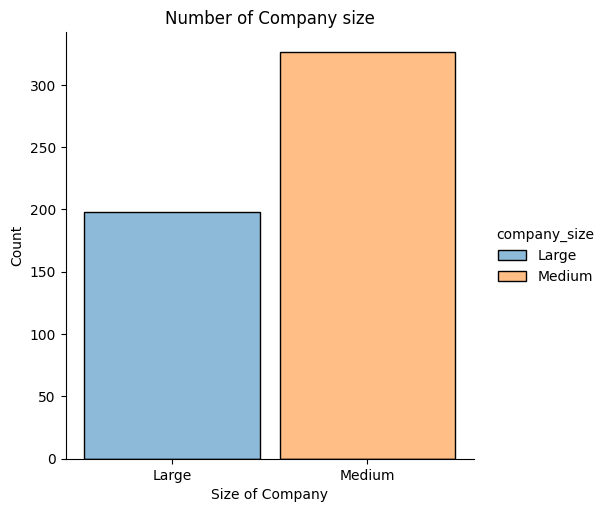

In [205]:
sns.displot(df,x='company_size', hue='company_size',shrink=0.9)
plt.title('Number of Company size')
plt.xlabel('Size of Company')
# it is observed that the medium size of companies (326) is more than large size of companies (198).

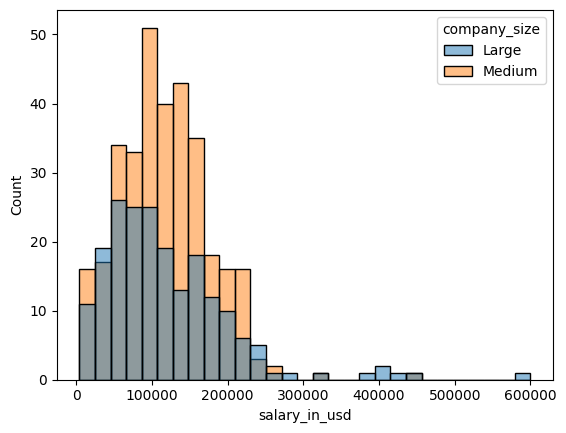

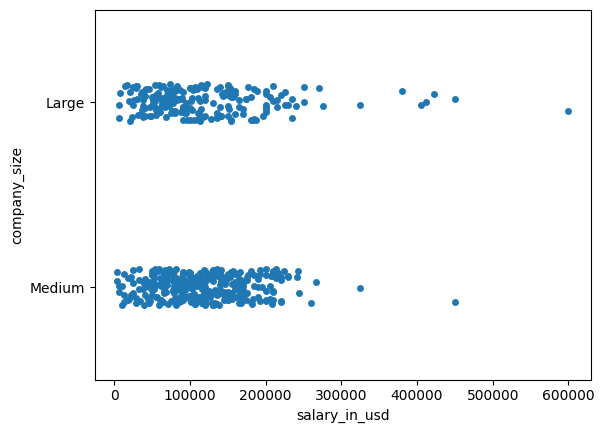

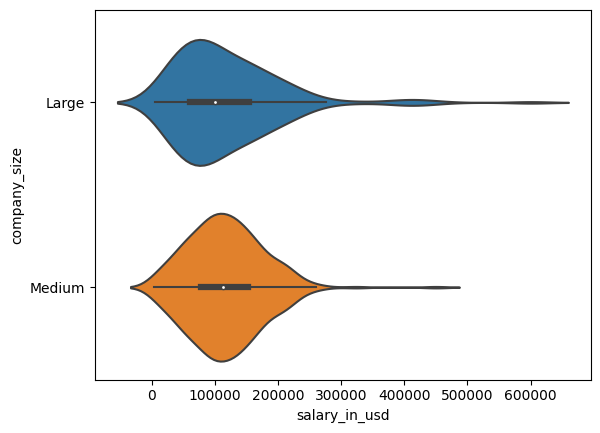

In [206]:
sns.histplot(data=df, x='salary_in_usd', hue='company_size')
plt.show()
# Since the dataset contains more companies of medium size, the count of companies of medium size is more than the companies of large size in most of the range of salary.
# However, in the range of 300000 to 600000 USD, most of the employees are from a large company.

sns.stripplot(data=df, x='salary_in_usd', y='company_size')
plt.show()
# By observation, the salary of these two sizes of companies is near.

sns.violinplot(data=df, x='salary_in_usd', y='company_size')
plt.show()
# By the violinlplot, the companies of large size have more outliers that having a much more higher salary.
# However, in the majority of both group, they are at the range of beginning to 250000 USD, 
# and the major proportion of companies of medium size seem to have higher salary than the major proportion of companies of large size.

company_size
Large     119242.994949
Medium    116905.466258
Name: salary_in_usd, dtype: float64


/var/folders/1v/pkmwdzd52x167y4lj_lpfch00000gn/T/ipykernel_41708/1194411409.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_salary_size=df.groupby('company_size').mean()['salary_in_usd']


Text(0.5, 1.0, 'Annual Salary on Average based on company size')

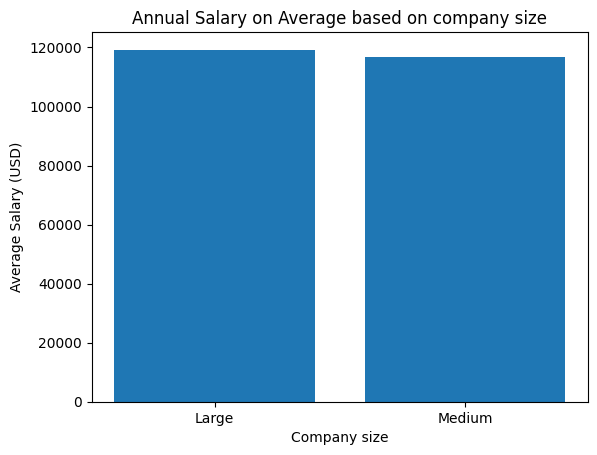

In [207]:
avg_salary_size=df.groupby('company_size').mean()['salary_in_usd']
print(avg_salary_size)
plt.bar(avg_salary_size.index, avg_salary_size.values)
plt.xlabel('Company size')
plt.ylabel('Average Salary (USD)')
plt.title('Annual Salary on Average based on company size')
# By roughly comparing the values of the average salary in two groups without some statistical testing methods, their results are close to each other.
# Large companies have average of 119242.994949 USD salary.
# Medium companies have average of 116905.466258 USD salary.

In [208]:
df.groupby('company_size').median()['salary_in_usd']
# By the medium, it is interesting that the companies of medium size have a higher value of medium than companies of large size.
# It is opposite to the results of their average.

/var/folders/1v/pkmwdzd52x167y4lj_lpfch00000gn/T/ipykernel_41708/3216755854.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('company_size').median()['salary_in_usd']


company_size
Large     100000.0
Medium    113188.0
Name: salary_in_usd, dtype: float64

To have a small conclusion, it seems that companies of large size may not surely have a higher salary than companies of medium size, since their results are really close.

But it may happens because of imbalance data, since there is no limitation on the experience level of respondents.

It may happened that within the respondents, the companies of medium size contain more employees with higher experience level than the companies of large size.

Therefore, it may be better to look at each kind of particular experience level of respondents, each as senior-level or mid-level employee and so on.

Text(0.5, 9.444444444444438, 'Experience Level')

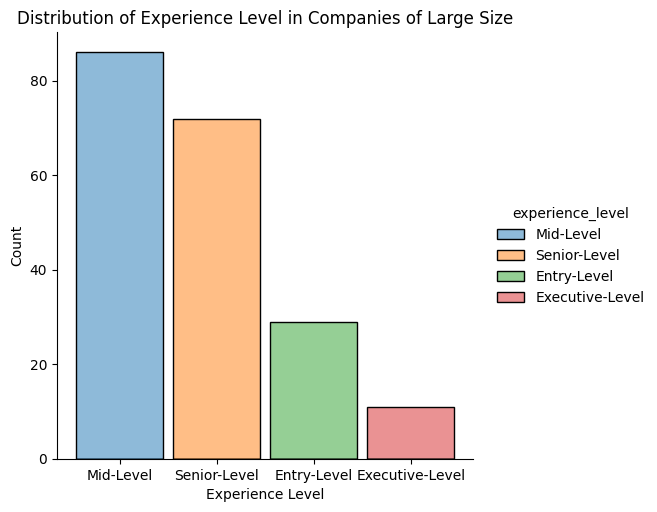

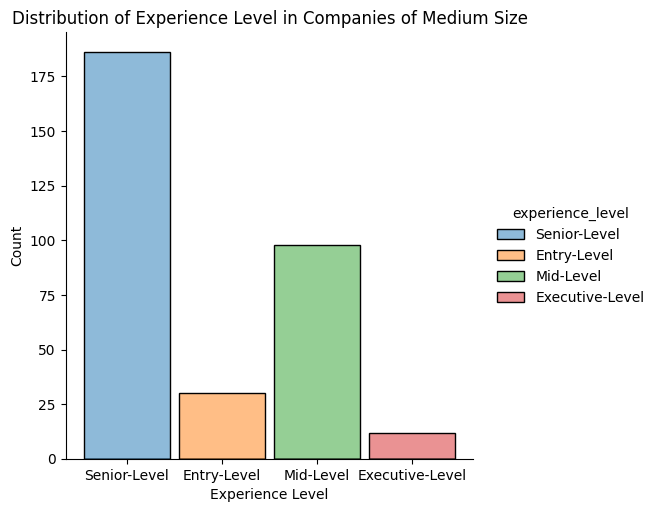

In [209]:
sns.displot(df[df['company_size']=='Large'],x='experience_level', hue='experience_level', shrink=0.9)
plt.title('Distribution of Experience Level in Companies of Large Size')
plt.xlabel('Experience Level')

sns.displot(df[df['company_size']=='Medium'],x='experience_level', hue='experience_level', shrink=0.9)
plt.title('Distribution of Experience Level in Companies of Medium Size')
plt.xlabel('Experience Level')

# OH! Bingo! 
# The majority of the respondents in companies of large size is mid-level employees!
# But the majority of the respondents in companies of medium size is senior-level employees.
# It is assumed that the salary of senior-level employees will be higher than mid-level employees, so the results above may be affected by this factor.

company_size
Large     98030.372093
Medium    90091.081633
Name: salary_in_usd, dtype: float64


/var/folders/1v/pkmwdzd52x167y4lj_lpfch00000gn/T/ipykernel_41708/4057010783.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_salary_size_mid=df[df['experience_level']=='Mid-Level'].groupby('company_size').mean()['salary_in_usd']


Text(0.5, 1.0, 'Annual Salary of Mid-Level employees on Average based on company size')

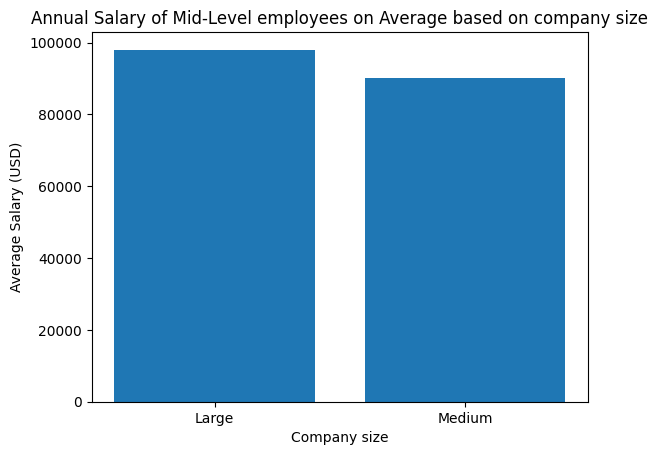

In [210]:
avg_salary_size_mid=df[df['experience_level']=='Mid-Level'].groupby('company_size').mean()['salary_in_usd']
print(avg_salary_size_mid)
plt.bar(avg_salary_size_mid.index, avg_salary_size_mid.values)
plt.xlabel('Company size')
plt.ylabel('Average Salary (USD)')
plt.title('Annual Salary of Mid-Level employees on Average based on company size')
# The results is more obvious than pervious that 
# the salary of mid-level employees in companies of large size is higher than the mid-level employees in ompanies of medium size.

company_size
Large     147591.013889
Medium    137815.596774
Name: salary_in_usd, dtype: float64


/var/folders/1v/pkmwdzd52x167y4lj_lpfch00000gn/T/ipykernel_41708/2350975877.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_salary_size_se=df[df['experience_level']=='Senior-Level'].groupby('company_size').mean()['salary_in_usd']


Text(0.5, 1.0, 'Annual Salary of Senior-Level employees on Average based on company size')

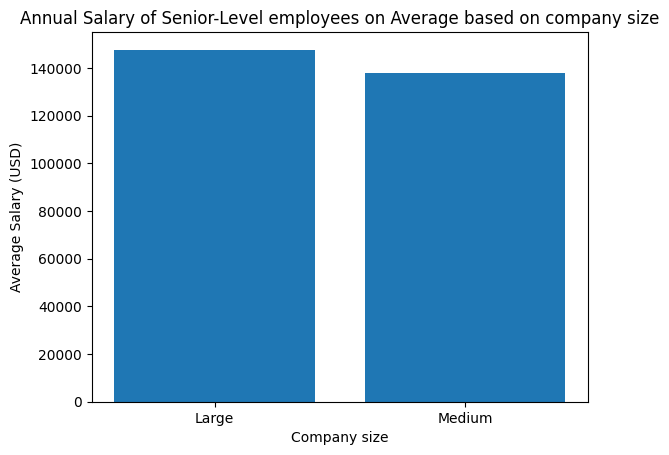

In [211]:
avg_salary_size_se=df[df['experience_level']=='Senior-Level'].groupby('company_size').mean()['salary_in_usd']
print(avg_salary_size_se)
plt.bar(avg_salary_size_se.index, avg_salary_size_se.values)
plt.xlabel('Company size')
plt.ylabel('Average Salary (USD)')
plt.title('Annual Salary of Senior-Level employees on Average based on company size')
# As for the case of senior level of employees, the result is more obvious and similar to the case of mid-level employee.

/var/folders/1v/pkmwdzd52x167y4lj_lpfch00000gn/T/ipykernel_41708/401281045.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_salary_size_en=df[df['experience_level']=='Entry-Level'].groupby('company_size').mean()['salary_in_usd']


company_size
Large     72813.241379
Medium    50321.800000
Name: salary_in_usd, dtype: float64


Text(0.5, 1.0, 'Annual Salary of Entry-Level employees on Average based on company size')

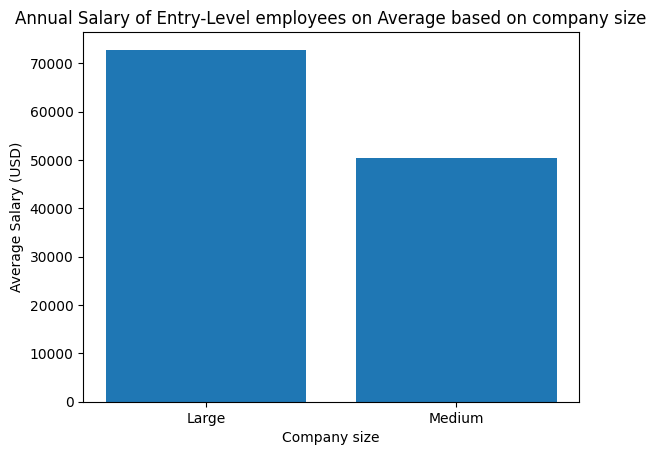

In [212]:
avg_salary_size_en=df[df['experience_level']=='Entry-Level'].groupby('company_size').mean()['salary_in_usd']
print(avg_salary_size_en)
plt.bar(avg_salary_size_en.index, avg_salary_size_en.values)
plt.xlabel('Company size')
plt.ylabel('Average Salary (USD)')
plt.title('Annual Salary of Entry-Level employees on Average based on company size')
# As for the case of entry-level of employees, the result is more more more obvious and similar to the case of pervious.

/var/folders/1v/pkmwdzd52x167y4lj_lpfch00000gn/T/ipykernel_41708/3810476858.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_salary_size_ex=df[df['experience_level']=='Executive-Level'].groupby('company_size').mean()['salary_in_usd']


company_size
Large     221942.181818
Medium    178241.750000
Name: salary_in_usd, dtype: float64


Text(0.5, 1.0, 'Annual Salary of Executive-Level employees on Average based on company size')

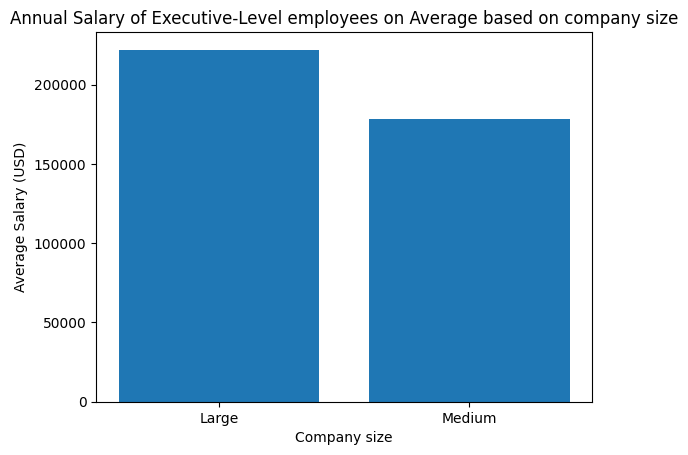

In [213]:
avg_salary_size_ex=df[df['experience_level']=='Executive-Level'].groupby('company_size').mean()['salary_in_usd']
print(avg_salary_size_ex)
plt.bar(avg_salary_size_ex.index, avg_salary_size_ex.values)
plt.xlabel('Company size')
plt.ylabel('Average Salary (USD)')
plt.title('Annual Salary of Executive-Level employees on Average based on company size')
# As for the case of entry-level of employees, the result is also obvious and similar to the case of pervious.

In conclusion, as for the overall view, the average salary of a company of large size may not be higher than the salary of a company of medium size.

However, due to the problem of imbalanced data that the majority of respondents in companies of large size is actually mid-level employees.

Comparing with companies of medium size, their majority of respondents is actually senior-level employees, which may affect the results.

By viewing the salary within each experience level, it is observed that in every category of experience level, the average salary of companies of large size is higher than the companies of medium size.

Before applying the statistics testing methods to test whether it is significant or not, by observation, the average salary of a company of large size should be higher than the salary of a company of medium size in each category of experience level.


Data Engineer                 126
Data Scientist                122
Data Analyst                   89
Machine Learning Engineer      29
Research Scientist             14
Data Science Manager           12
Data Architect                 11
Data Analytics Manager          7
Machine Learning Scientist      6
Principal Data Scientist        6
Name: job_title, dtype: int64


Text(0.5, 1.0, 'Top 10 Job Data Related Job Titles')

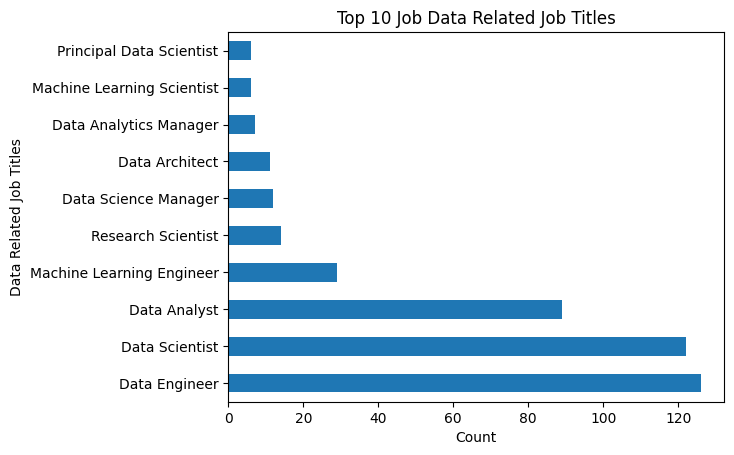

In [214]:
# Other interesting graphs for information
top10_job = df['job_title'].value_counts()[:10]
print(top10_job)
top10_job.plot.barh()
plt.xlabel('Count')
plt.ylabel('Data Related Job Titles')
plt.title('Top 10 Job Data Related Job Titles')
# DE, DS, DA is the three main jobs in data science domain.